
## Meausure elongation kinetics of Alpha-helix vs Beta-sheet forming mRNAs

### Goal

- Testing VKFS vs KVFS and SVKF vs SKVF alpha helix/beta sheet inserts. Tested each insert in technical triplicate.  

- We expect that beta-sheet forming peptides strongly decrease translation kinetics. 



### Load libraries

In [2]:
library(tidyverse)
library(plotrix)
library(rasilabRtemplates)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Read in data and annotations

- Note that the kinetic interval times got thrown off slightly. The machine was not quite able to keep up with a 0.5s integration time for 13 wells, over 10 seconds. However, kinetic intervral between each cycle was still ~10s for each cycle. 

In [3]:
rawcounts <- read_csv("../data/alpha_beta_rrl_data.csv") %>% 
  print()

annotations <- read_csv("../data/alpha_beta_sample_annotations.csv") %>% 
  print()

Rows: 200 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): cycle, time, temp, A14, A16, C14, C16, E14, E16, G14, G16, I14, I1...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 200 × 16
   cycle  time  temp   A14   A16   C14   C16   E14   E16   G14   G16   I14   I16
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1     1   0    29.9    -3     8     6     4    -3     6    -1     4    12     6
 2     2  10.7  29.9    18     8     6     6     8     4     8     6    12     0
 3     3  21.4  30.2    12    -1    12    -1     6     8     0     8     6    -1
 4     4  32.2  30.3     4     2     6     2    10     2     2     4     8     0
 5     5  42.9  30.2    10     2    12     6     0     2     4     2    12     4
 6     6  53.6  30.2     8     2     4    12    10    -1     2     2     4     6
 7     7  64.3  30.2    -1     4     0    12    20    10     6    12     6     8
 8     8  75.1  30.1    -1    16     4     0    24     6     6     8     6     0
 9     9  85.8  29.9     4     0     8    -1    10     2    -1     6     2    16
10    10  96.5  29.7    -1    12     6    12    12    12    -1     2     4     8
# … wit

Rows: 13 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): well, mrna_id, dipeptide, structure
dbl (1): replicate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 13 × 5
   well  mrna_id dipeptide structure   replicate
   <chr> <chr>   <chr>     <chr>           <dbl>
 1 A14   129m8   VKFS      Beta-Sheet          1
 2 C14   129m9   KVFS      Alpha-Helix         1
 3 E14   129m10  SVKF      Beta-Sheet          1
 4 G14   129m11  SKVF      Alpha-Helix         1
 5 I14   129m8   VKFS      Beta-Sheet          2
 6 K14   129m9   KVFS      Alpha-Helix         2
 7 M14   129m10  SVKF      Beta-Sheet          2
 8 O14   129m11  SKVF      Alpha-Helix         2
 9 A16   129m8   VKFS      Beta-Sheet          3
10 C16   129m9   KVFS      Alpha-Helix         3
11 E16   129m10  SVKF      Beta-Sheet          3
12 G16   129m11  SKVF      Alpha-Helix         3
13 I16   NA      No mRNA   None                1


### Join annotations to data


In [4]:
join_data <- rawcounts %>% 
  select(-temp, -cycle) %>% 
  pivot_longer(!time, names_to = "well", values_to = "count") %>% 
  left_join(annotations, by = "well") %>% 
  mutate(replicate = as.factor(replicate)) %>% 
  print()

# A tibble: 2,600 × 7
    time well  count mrna_id dipeptide structure   replicate
   <dbl> <chr> <dbl> <chr>   <chr>     <chr>       <fct>    
 1     0 A14      -3 129m8   VKFS      Beta-Sheet  1        
 2     0 A16       8 129m8   VKFS      Beta-Sheet  3        
 3     0 C14       6 129m9   KVFS      Alpha-Helix 1        
 4     0 C16       4 129m9   KVFS      Alpha-Helix 3        
 5     0 E14      -3 129m10  SVKF      Beta-Sheet  1        
 6     0 E16       6 129m10  SVKF      Beta-Sheet  3        
 7     0 G14      -1 129m11  SKVF      Alpha-Helix 1        
 8     0 G16       4 129m11  SKVF      Alpha-Helix 3        
 9     0 I14      12 129m8   VKFS      Beta-Sheet  2        
10     0 I16       6 NA      No mRNA   None        1        
# … with 2,590 more rows


### Calculate mean RLU and standard error

- Select appropriate linear time range.

In [5]:
plot_data <- join_data %>% 
  # Caluclate mean values for a given time, with standard error
  group_by(time, dipeptide) %>% 
  mutate(count = count / 1e5) %>% 
  mutate(mean_nluc = mean(count), se_nluc = plotrix::std.error(count)) %>% 
  ungroup() %>% 
 #  Select only time from when expressions starts to where signal peaks
  filter(time >=350 & time <=1200) %>% 
  print()

# A tibble: 1,027 × 9
    time well    count mrna_id dipeptide structure   replicate mean_n…¹  se_nluc
   <dbl> <chr>   <dbl> <chr>   <chr>     <chr>       <fct>        <dbl>    <dbl>
 1  354. A14   0.00012 129m8   VKFS      Beta-Sheet  1          8.67e-5  3.33e-5
 2  354. A16   0.00002 129m8   VKFS      Beta-Sheet  3          8.67e-5  3.33e-5
 3  354. C14   0.00172 129m9   KVFS      Alpha-Helix 1          1.11e-3  5.10e-4
 4  354. C16   0.0001  129m9   KVFS      Alpha-Helix 3          1.11e-3  5.10e-4
 5  354. E14   0.00022 129m10  SVKF      Beta-Sheet  1          1.93e-4  7.06e-5
 6  354. E16   0.00006 129m10  SVKF      Beta-Sheet  3          1.93e-4  7.06e-5
 7  354. G14   0.0033  129m11  SKVF      Alpha-Helix 1          3.15e-3  1.64e-3
 8  354. G16   0.00024 129m11  SKVF      Alpha-Helix 3          3.15e-3  1.64e-3
 9  354. I14   0.00012 129m8   VKFS      Beta-Sheet  2          8.67e-5  3.33e-5
10  354. I16   0.00006 NA      No mRNA   None        1          6   e-5 NA      
# … wi


### Plot of luminescence values over time

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


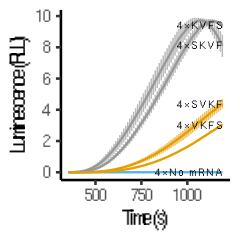

In [6]:
options(repr.plot.width=2, repr.plot.height=2) 
# options(repr.plot.width=1, repr.plot.height=1) for publication 

label_data <- plot_data %>% 
  mutate(dipeptide = paste0("4×", dipeptide)) %>% 
  group_by(dipeptide) %>% 
  arrange(-time) %>% 
  slice(1) %>% 
  ungroup() 
  
plot_data %>%
  ggplot(aes(x = time, y = mean_nluc, color = structure, ymax = mean_nluc + se_nluc, ymin = mean_nluc - se_nluc,
             label = dipeptide, group = dipeptide)) + 
  geom_line() +
  geom_errorbar(width = 0, size = 0.3, alpha=0.3) +
  # Make labels for the individual inserts
  geom_text(data = label_data, size=2, color = "black", hjust=1)+
  # Show labels even though they're off grid
  coord_cartesian(clip = "off")+
  scale_colour_manual(values = cbPalette)+
  labs(x = "Time (s)", y = "Luminescence (RLU)") +
  scale_y_continuous(breaks = scales::pretty_breaks(n=4))+
  # scale_x_continuous(breaks = scales::pretty_breaks(n=10), limits = c(350, 1375))+
  guides(color = F)

ggsave("../figures/svkf_elongation_kinetics.pdf", width = 2, height = 2) 


## Calculate transit time

`summarise()` has grouped output by 'dipeptide'. You can override using the
`.groups` argument.


dipeptide,structure,mean_time,se_time
<fct>,<chr>,<dbl>,<dbl>
4×KVFS,Alpha-Helix,563.2803,6.590510
4×SKVF,Alpha-Helix,539.4661,14.187509
4×SVKF,Beta-Sheet,721.9558,25.110752
4×VKFS,Beta-Sheet,764.6473,2.114438


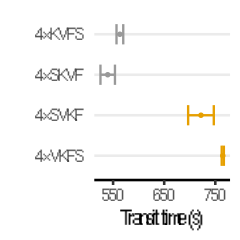

In [7]:
options(repr.plot.width=2, repr.plot.height=2) 
# options(repr.plot.width=1, repr.plot.height=1) for publication 

plot_data <- join_data %>% 
  mutate(fit_points = case_when(
    dipeptide %in% c("VKFS", "SVKF") & time > 900 & time < 1200 ~ T,
    dipeptide %in% c("KVFS", "SKVF") & time > 600 & time < 900 ~ T,
    T ~ F
  )) %>% 
  filter(fit_points) %>% 
  arrange(replicate, dipeptide) %>% 
  group_by(dipeptide, structure, replicate) %>% 
  nest() %>%
  mutate(fit = map(data, function(df) lm(formula = time ~ count, data=df))) %>%
  mutate(fit = map(fit, broom::tidy)) %>%
  unnest(fit) %>% 
  ungroup() %>% 
  select(structure, dipeptide, replicate, term, estimate) %>% 
  pivot_wider(names_from = "term", values_from = "estimate") %>%
  janitor::clean_names() %>% 
  arrange(dipeptide) %>% 
  group_by(dipeptide, structure) %>%
  summarize(mean_time = mean(intercept), se_time = plotrix::std.error(intercept)) %>%
  ungroup() %>% 
  mutate(dipeptide = fct_rev(as.factor(paste0("4×", dipeptide))))

plot_data


plot_data %>% 
  ggplot(aes(y = dipeptide, x = mean_time,  color = structure,
             xmin = mean_time - se_time, xmax = mean_time + se_time)) +
  geom_point(size = 0.5) +
  geom_errorbar(width=0.5) +
  scale_x_continuous(breaks = c(550, 650, 750)) +
  scale_color_manual(values = cbPalette) +
  labs(x = "Transit time (s)", y = "") +
  theme(axis.ticks.y = element_blank(), 
        panel.grid.major.y = element_line(),
        axis.line.y = element_blank(),
        legend.position = "none") +
  NULL
ggsave("../figures/svkf_transit_time.pdf", width = 2, height = 2) 